<a href="https://colab.research.google.com/github/DinhThiQuynh/DA/blob/main/DoAnTotNghiep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# @title Import các thư viện cần thiết
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.dates as mdates
from sklearn import linear_model
import math
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import os

In [48]:
# @title Đọc dữ liệu thừ Drive
from google.colab import drive
drive.mount('/content/drive')
dt= pd.read_csv('/content/drive/MyDrive/dataset/dataset.csv' ,
                      na_values=['null'],index_col='Time',parse_dates=True,infer_datetime_format=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# @title Thông tin dữ liệu
dt.head()

,thuongnhat,namdong,luuluong
Time,,,
2021-11-18 20:00:00,1.6,0.0,232.6794
2021-11-18 21:00:00,0.8,0.8,245.7536
2021-11-18 22:00:00,0.4,0.2,272.0101
2021-11-18 23:00:00,0.0,0.6,245.7590
2021-11-19 00:00:00,0.0,0.4,232.6642


In [50]:
# @title Kiểm tra dữ liệu trống
dt.isnull().values.any()

False

In [51]:
# @title chọn giá trị dự đoán
target = pd.DataFrame(dt['luuluong'])

In [52]:
feature_columns = ['thuongnhat', 'namdong', 'luuluong']

In [53]:
# @title chuẩn hóa dữ liệu
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(dt[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=dt.index)
feature_minmax_transform.head()

,thuongnhat,namdong,luuluong
Time,,,
2021-11-18 20:00:00,0.017467,0.000000,0.032312
2021-11-18 21:00:00,0.008734,0.006536,0.034129
2021-11-18 22:00:00,0.004367,0.001634,0.037776
2021-11-18 23:00:00,0.000000,0.004902,0.034129
2021-11-19 00:00:00,0.000000,0.003268,0.032310


Giảm kích thước tập dữ liệu ban đầu, bỏ đi 90 giá trị cuối cùng để tiến hành kiểm thử trên một tập

In [54]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target.shape)

target = target.shift(-1) #dịch dữ liệu lên 1 dòng để dùng giá trị quá khứ dự đoán giá trị tương lai
validation_y = target[-90:-1] #tạo dữ liệu nhãn dùng trong đánh giá mô hình
target = target[: -90]


validation_X = feature_minmax_transform[-90:-1] #tạo dữ liệu đặc trưng tương ứng với dữ liệu kiểm thử trong quá trình huấn luyện mô hình
feature_minmax_transform = feature_minmax_transform[:-90] #bỏ dữ liệu cuối cùng
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target.shape)
display(target.tail())

,thuongnhat,namdong,luuluong
Time,,,
2021-11-18 20:00:00,0.017467,0.000000,0.032312
2021-11-18 21:00:00,0.008734,0.006536,0.034129
2021-11-18 22:00:00,0.004367,0.001634,0.037776
2021-11-18 23:00:00,0.000000,0.004902,0.034129
2021-11-19 00:00:00,0.000000,0.003268,0.032310


Shape of features :  (8125, 3)
Shape of target :  (8125, 1)


,thuongnhat,namdong,luuluong
Time,,,
2022-10-27 02:00:00,0.0,0.0,0.032414
2022-10-27 03:00:00,0.0,0.0,0.032412
2022-10-27 04:00:00,0.0,0.0,0.033931
2022-10-27 05:00:00,0.0,0.0,0.031658
2022-10-27 06:00:00,0.0,0.0,0.027863


,luuluong
Time,
2022-10-27 02:00:00,233.3954
2022-10-27 03:00:00,244.3335
2022-10-27 04:00:00,227.9665
2022-10-27 05:00:00,200.6467
2022-10-27 06:00:00,222.4860



 -----After process------ 

Shape of features :  (8035, 3)
Shape of target :  (8035, 1)


,luuluong
Time,
2022-10-23 09:00:00,163.2134
2022-10-23 10:00:00,168.3587
2022-10-23 11:00:00,173.5080
2022-10-23 12:00:00,162.8811
2022-10-23 13:00:00,168.0457


In [55]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target[:len(train_index)].values.ravel(), target[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [11]:
X_train.shape

(7305, 3)

In [12]:
X_test.shape

(730, 3)

In [13]:
y_train.shape

(7305,)

In [56]:
y_test.shape

(730,)

In [57]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RMSE_score = np.sqrt(mean_squared_error(validation_y, predicted))
    #normalized_rmse =  RMSE_score / (max(validation_y) - min(validation_y))
    print('RMSE: ', RMSE_score)
    #print('RMSE: ', normalized_rmse)

    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    mae = mean_absolute_error(validation_y, predicted)
    print('MAE: ', mae)
    plt.plot(validation_y.index, predicted,'r', label='du doan')
    plt.plot(validation_y.index, validation_y,'b', label='thuc te')
    plt.ylabel('Luu Luong')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %H:%M %p'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Du Doan Vs Thuc Te')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  52.58066991775112
R2 score:  0.9501604680155369
MAE:  27.99378873629514


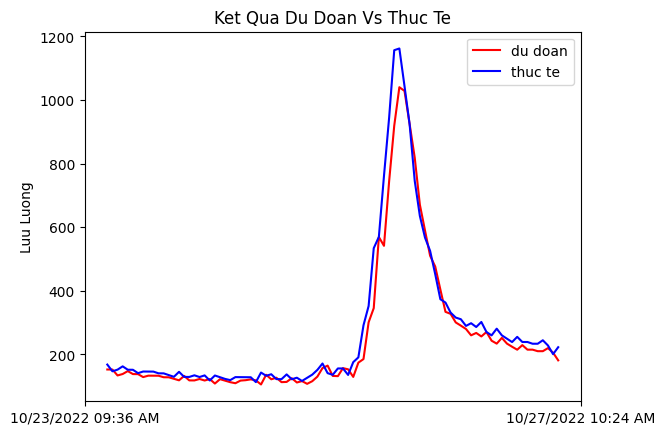

In [58]:
s_model = SVR(kernel='linear', C= 1000)
s_model = s_model.fit(X_train, y_train)
validate_result(s_model,'Ket Qua')

RMSE:  101.21352309797732
R2 score:  0.815328953641616
MAE:  50.706774182022464


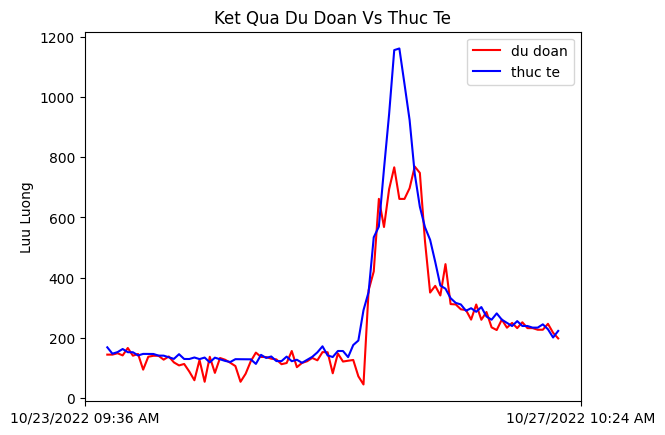

In [62]:
r_model = RandomForestRegressor(n_estimators= 10)
r_model = r_model.fit(X_train,y_train)
validate_result(r_model,'Ket Qua')

RMSE:  51.05874929532355
R2 score:  0.9530038728520894
MAE:  26.20821430152146


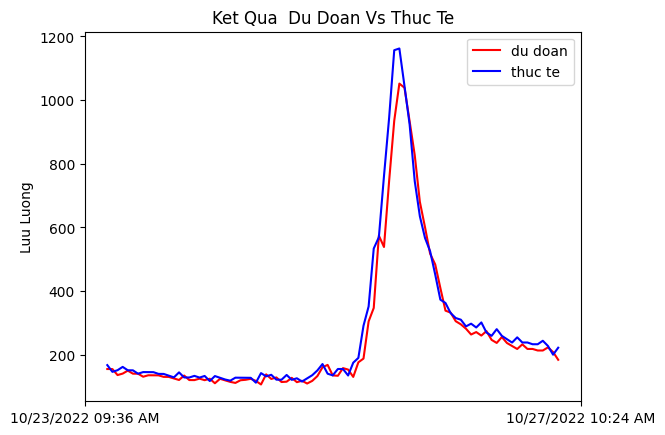

In [63]:

l_model = LinearRegression(fit_intercept=True)
l_model= l_model.fit(X_train,y_train)
validate_result(l_model,'Ket Qua ')

In [64]:
s_y_pred = s_model.predict(validation_X)
print('Ket qua du doan cua mo hinh SVM: ')#, s_y_pred[-10:])
for s_pred in s_y_pred[-5:]:
    print(s_pred)
r_y_pred = r_model.predict(validation_X)
print('Ket qua du doan cua mo hinh Random Forest: ')#, r_y_pred[-10:])
for r_pred in r_y_pred[-5:]:
    print(r_pred)
l_y_pred = l_model.predict(validation_X)
print('Ket qua du doan cua mo hinh Linear Regression: ')#, l_y_pred[-10:])
for l_pred in l_y_pred[-5:]:
    print(l_pred)

Ket qua du doan cua mo hinh SVM: 
209.98290011220791
209.97012620503767
219.60614510244267
205.18748726481135
181.11986043077934
Ket qua du doan cua mo hinh Random Forest: 
226.39226
226.39226
246.11219999999997
216.33820000000006
197.54777999999996
Ket qua du doan cua mo hinh Linear Regression: 
213.7763883574999
213.76348208657782
223.4993498088543
208.9312852445791
184.61426866957538
